In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0  # Normalize 

# Ensure labels are integers for sparse loss functions
y_train, y_test = tf.squeeze(y_train), tf.squeeze(y_test)

In [6]:
from RAN_cifar import ResidualAttentionNetwork

input_shape = (32, 32, 3)  # CIFAR-10 input shape
num_classes = 10  # CIFAR-10 has 10 classes


model = ResidualAttentionNetwork(
    input_shape=input_shape,
    n_classes=num_classes,
    activation='softmax'
).build_model()

#Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


#Train the Model
batch_size = 64
epochs = 15

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,  # Use 20% of the training data for validation
    batch_size=batch_size,
    epochs=epochs
)


Epoch 1/15
625/625 [==============================] - 49s 62ms/step - loss: 1.7412 - accuracy: 0.3772 - val_loss: 1.5264 - val_accuracy: 0.4745
Epoch 2/15
625/625 [==============================] - 37s 59ms/step - loss: 1.1080 - accuracy: 0.6015 - val_loss: 1.3000 - val_accuracy: 0.5551
Epoch 3/15
625/625 [==============================] - 36s 58ms/step - loss: 0.8515 - accuracy: 0.6958 - val_loss: 1.1653 - val_accuracy: 0.6126
Epoch 4/15
625/625 [==============================] - 36s 58ms/step - loss: 0.6807 - accuracy: 0.7613 - val_loss: 0.8831 - val_accuracy: 0.6985
Epoch 5/15
625/625 [==============================] - 37s 59ms/step - loss: 0.5460 - accuracy: 0.8091 - val_loss: 1.1022 - val_accuracy: 0.6694
Epoch 6/15
625/625 [==============================] - 37s 59ms/step - loss: 0.4525 - accuracy: 0.8404 - val_loss: 1.1091 - val_accuracy: 0.6634
Epoch 7/15
625/625 [==============================] - 37s 59ms/step - loss: 0.3542 - accuracy: 0.8781 - val_loss: 1.1927 - val_accuracy:

In [9]:
epochs = 5

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,  # Use 20% of the training data for validation
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/5
625/625 [==============================] - 37s 59ms/step - loss: 0.1276 - accuracy: 0.9550 - val_loss: 1.2070 - val_accuracy: 0.7349
Epoch 2/5
625/625 [==============================] - 37s 59ms/step - loss: 0.1150 - accuracy: 0.9597 - val_loss: 1.6031 - val_accuracy: 0.6874
Epoch 3/5
625/625 [==============================] - 37s 59ms/step - loss: 0.1058 - accuracy: 0.9627 - val_loss: 1.3203 - val_accuracy: 0.7329
Epoch 4/5
625/625 [==============================] - 37s 59ms/step - loss: 0.1167 - accuracy: 0.9582 - val_loss: 1.4986 - val_accuracy: 0.7148
Epoch 5/5
625/625 [==============================] - 37s 59ms/step - loss: 0.0985 - accuracy: 0.9650 - val_loss: 1.3574 - val_accuracy: 0.7369


In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 5s 15ms/step - loss: 1.4276 - accuracy: 0.7275
Test Loss: 1.4276
Test Accuracy: 0.7275


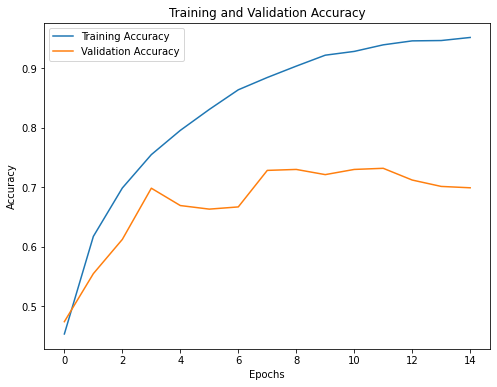

In [8]:
# Step 6: Plot Training and Validation Curves (Optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_128 (Conv2D)             (None, 32, 32, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_126 (BatchN (None, 32, 32, 32)   128         conv2d_128[0][0]                 
__________________________________________________________________________________________________
batch_normalization_127 (BatchN (None, 32, 32, 32)   128         batch_normalization_126[0][0]    
____________________________________________________________________________________________

Total params: 698,442
Trainable params: 685,002
Non-trainable params: 13,440
__________________________________________________________________________________________________
